In [1]:
from fastai.vision.all import *

from fastai.data.all import *
from fastai.imports import *
from fastai.vision.core import *
import torchvision.models as models

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = 'C:/Users/light/Documents/Fastbook/Personal-Machine-Learning-Data/'

In [2]:
path_imgs = Path(data_path + 'Brain Tumor Images')

In [3]:
def label_func(fn): return path_imgs/"Masks"/f"{fn.stem}_mask{fn.suffix}"

In [4]:
codes = ['0', '1']

In [5]:
img_seg_dl = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter=RandomSplitter(), 
                   item_tfms=[ToTensor],
                   batch_tfms=[IntToFloatTensor(div_mask=255.0), *aug_transforms()])

In [6]:
dls = img_seg_dl.dataloaders(path_imgs/'Images', path=path_imgs, num_workers=0, bs=4)

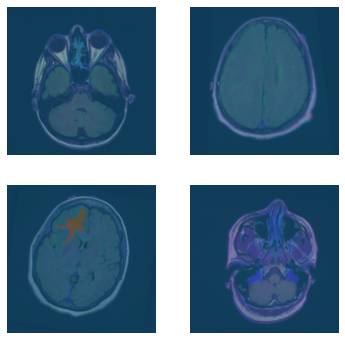

In [7]:
dls.show_batch(max_n=6)

In [8]:
learn = unet_learner(dls, resnet18, metrics=Dice())
learn.fine_tune(10)

epoch,train_loss,valid_loss,dice,time
0,0.034368,0.029583,0.550058,02:16


epoch,train_loss,valid_loss,dice,time
0,0.010251,0.012012,0.794772,01:33
1,0.011341,0.019663,0.688767,01:33
2,0.008549,0.009046,0.837294,01:32
3,0.006960,0.009967,0.808797,01:36
4,0.008108,0.009015,0.866736,01:35
5,0.006459,0.006880,0.886920,01:34
6,0.006132,0.006158,0.893049,01:36
7,0.005207,0.005825,0.899773,01:32
8,0.004324,0.005869,0.897559,01:31
9,0.004719,0.005864,0.900363,01:32


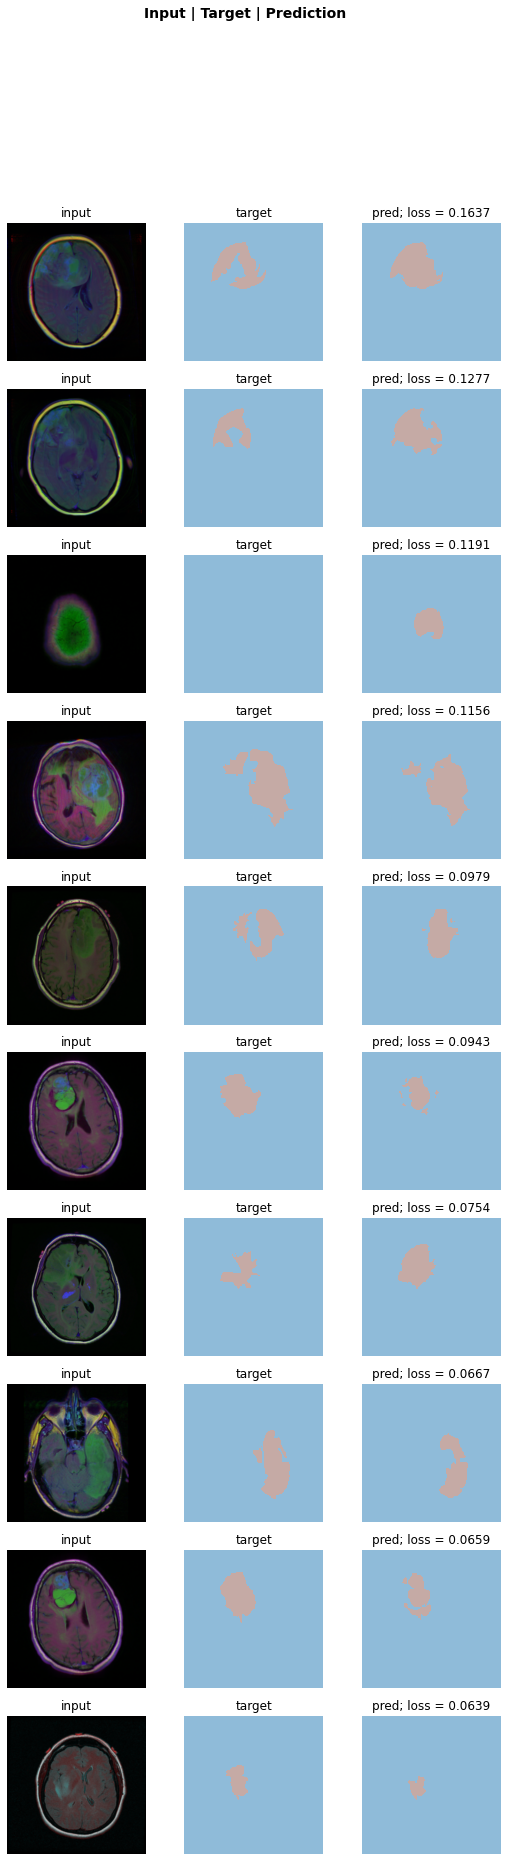

In [11]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=10)